# Age Model

This note we'll build a CNN to classify the gender problem. To build our CNN we'll use [tensorflow](https://www.tensorflow.org/)

## Setup

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from utils.helpers import unwrapper_data
from sklearn.model_selection import train_test_split
from glob import glob
%matplotlib inline

## Data

In [2]:
DATA_PATH = 'data/'
data = glob(DATA_PATH+'*.age.pkl')
print(data)

['data/03.age.pkl', 'data/02.age.pkl', 'data/01.age.pkl', 'data/04.age.pkl', 'data/05.age.pkl']


## Model

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64,
                                 kernel_size=(3,3),
                                 strides=(2,2),
                                 padding='same',
                                 input_shape=(200,200,3)))
model.add(tf.keras.layers.BatchNormalization(axis=3))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(2,2), padding='same'))
model.add(tf.keras.layers.BatchNormalization(axis=3))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(2,2), padding='same'))
model.add(tf.keras.layers.BatchNormalization(axis=3))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=8, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 100, 100, 64)      1792      
_________________________________________________________________
batch_normalization_16 (Batc (None, 100, 100, 64)      256       
_________________________________________________________________
activation_16 (Activation)   (None, 100, 100, 64)      0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 25, 25, 128)       73856     
_________________________________________________________________
batch_normalization_17 (Batc (None, 25, 25, 128)       512       
__________

## Input

In [12]:
X, y = unwrapper_data(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

y_oh_train = tf.keras.utils.to_categorical(y=y_train, num_classes=8).astype(np.uint8)
y_oh_test =  tf.keras.utils.to_categorical(y=y_test, num_classes=8).astype(np.uint8)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14193, 200, 200, 3), (2505, 200, 200, 3), (14193,), (2505,))

## Training

In [13]:
BATCH_SIZE = 64
EPOCHS = 100

In [14]:
list_callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1),
                  tf.keras.callbacks.ModelCheckpoint('models/best_model_age.hdf5', monitor='val_loss', verbose=1, save_best_only=True)]
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

hist = model.fit(x=X_train, y=y_oh_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=list_callbacks, validation_split=0.15)

Train on 12064 samples, validate on 2129 samples
Epoch 1/100
12032/12064 [============================>.] - ETA: 3s - loss: 1.7920 - acc: 0.4076
Epoch 00001: val_loss improved from inf to 1.60065, saving model to models/best_model_age.hdf5
12064/12064 [==============================] - 1158s 96ms/step - loss: 1.7917 - acc: 0.4077 - val_loss: 1.6007 - val_acc: 0.4908
Epoch 2/100
12032/12064 [============================>.] - ETA: 2s - loss: 1.5318 - acc: 0.4840
Epoch 00002: val_loss improved from 1.60065 to 1.47324, saving model to models/best_model_age.hdf5
12064/12064 [==============================] - 880s 73ms/step - loss: 1.5308 - acc: 0.4844 - val_loss: 1.4732 - val_acc: 0.5402
Epoch 3/100
12032/12064 [============================>.] - ETA: 1s - loss: 1.4319 - acc: 0.5244
Epoch 00003: val_loss improved from 1.47324 to 1.36450, saving model to models/best_model_age.hdf5
12064/12064 [==============================] - 459s 38ms/step - loss: 1.4310 - acc: 0.5247 - val_loss: 1.3645 - v

12032/12064 [============================>.] - ETA: 1s - loss: 0.8760 - acc: 0.6671
Epoch 00029: val_loss did not improve from 1.09005
12064/12064 [==============================] - 513s 43ms/step - loss: 0.8757 - acc: 0.6674 - val_loss: 1.3657 - val_acc: 0.5045
Epoch 30/100
12032/12064 [============================>.] - ETA: 1s - loss: 0.8683 - acc: 0.6744
Epoch 00030: val_loss did not improve from 1.09005
12064/12064 [==============================] - 636s 53ms/step - loss: 0.8675 - acc: 0.6746 - val_loss: 1.1953 - val_acc: 0.5543
Epoch 31/100
12032/12064 [============================>.] - ETA: 1s - loss: 0.8539 - acc: 0.6774
Epoch 00031: val_loss did not improve from 1.09005
12064/12064 [==============================] - 681s 56ms/step - loss: 0.8542 - acc: 0.6771 - val_loss: 1.2582 - val_acc: 0.4927
Epoch 32/100
12032/12064 [============================>.] - ETA: 16s - loss: 0.8392 - acc: 0.6838
Epoch 00032: val_loss did not improve from 1.09005
12064/12064 [=======================

In [16]:
print('Train =>', model.evaluate(X_train, y_oh_train, verbose=0))
print('Test =>', model.evaluate(X_test, y_oh_test, verbose=0))

Train => [1.0983051392389203, 0.566828718384401]
Test => [1.2169057378274, 0.5253493014091027]


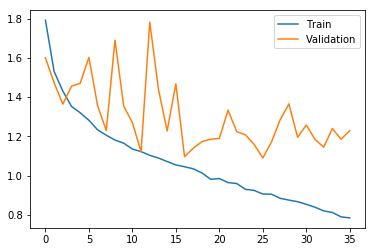

In [17]:
hist_dict = hist.history
loss_val = hist_dict['val_loss']
loss_train = hist_dict['loss']

plt.figure()
plt.plot(loss_train, label='Train')
plt.plot(loss_val, label='Validation')
plt.legend()

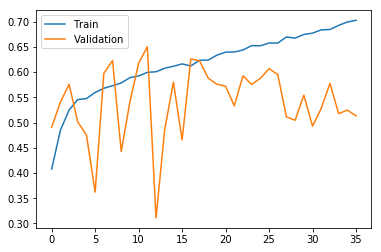

In [18]:
hist_dict = hist.history
acc_val = hist_dict['val_acc']
acc_train = hist_dict['acc']

plt.figure()
plt.plot(acc_train, label='Train')
plt.plot(acc_val, label='Validation')
plt.legend()